# ✅ Step 1: Provide Meaningful Treatment to All Values Where Age < 18

In [18]:
import pandas as pd

# Load dataset (assuming you've read it from Excel/CSV earlier)
df = pd.read_excel("Credit Banking_Project - 1.xls")
print(df)

    Sl No: Customer        Age        City Credit Card Product   Limit  \
0        1       A1   0.928521   BANGALORE                Gold  500000   
1        2       A2  35.534551    CALCUTTA              Silver  100000   
2        3       A3  11.559307      COCHIN            Platimum   10000   
3        4       A4  45.820278      BOMBAY            Platimum   10001   
4        5       A5  69.663948   BANGALORE            Platimum   10002   
..     ...      ...        ...         ...                 ...     ...   
95      96      A96  29.631637     CHENNAI              Silver  100000   
96      97      A97  20.611833  TRIVANDRUM            Platimum   10000   
97      98      A98  40.538985    CALCUTTA            Platimum   10001   
98      99      A99  21.588666    CALCUTTA            Platimum   10002   
99     100     A100  23.607638      COCHIN              Silver  100000   

   Company        Segment  
0       C1  Self Employed  
1       C2   Salaried_MNC  
2       C3   Salaried_Pvt  

### Remove those entries

In [3]:
df = df[df['Age'] >= 18]
print("✅ Removed all customers with Age < 18.")

✅ Removed all customers with Age < 18.


# 🔜 Step 2: Is there any customer who spent more than their credit limit for any particular month?


### 📌 Add Monthly Info and Simulated Spending Data:

In [5]:
import numpy as np
# Simulate data for Jan, Feb, Mar
months = ['Jan', 'Feb', 'Mar']
df_monthly = pd.concat([df.assign(Month=month) for month in months], ignore_index=True)

# Random monthly Amount_Spent (between 5,000 and 100,000)
np.random.seed(42)
df_monthly['Amount_Spent'] = np.random.randint(5000, 100000, size=len(df_monthly))


### 📌 check overspending:

In [6]:
# Check where spending exceeds credit limit
df_monthly['Overspent'] = df_monthly['Amount_Spent'] > df_monthly['Limit']

# Filter those who overspent
overspent_customers = df_monthly[df_monthly['Overspent'] == True]

# Display result
overspent_customers[['Customer', 'Month', 'Amount_Spent', 'Limit']]


,Customer,Month,Amount_Spent,Limit
2,A5,Jan,81820,10002
12,A20,Jan,72221,10001
13,A21,Jan,69820,10002
23,A33,Jan,33693,10002
33,A47,Jan,40773,10000
34,A48,Jan,72435,10001
35,A49,Jan,61886,10002
49,A69,Jan,28897,10000
50,A70,Jan,73148,10001
51,A71,Jan,28483,10002


# ✅ Step 3: Monthly Spend of Each Customer

### 📌 Code to Calculate Monthly Spend:

In [7]:
monthly_spend = df_monthly.groupby(['Customer', 'Month'])['Amount_Spent'].sum().reset_index()
monthly_spend = monthly_spend.sort_values(by=['Customer', 'Month'])

# Display result
monthly_spend.head()

,Customer,Month,Amount_Spent
0,A100,Feb,27299
1,A100,Jan,96387
2,A100,Mar,91202
3,A11,Feb,87798
4,A11,Jan,92498


# ✅ Step 4: Monthly Repayment of Each Customer

### 📌 Step 1: Add Amount_Repaid to Your Data

In [8]:
# Simulate random repayment values (some may be less than spent)
np.random.seed(123)
df_monthly['Amount_Repaid'] = np.random.randint(3000, 90000, size=len(df_monthly))


### 📌 Step 2: Calculate Monthly Repayment Per Customer

In [9]:
monthly_repay = df_monthly.groupby(['Customer', 'Month'])['Amount_Repaid'].sum().reset_index()
monthly_repay = monthly_repay.sort_values(by=['Customer', 'Month'])

# Display result
monthly_repay.head()


,Customer,Month,Amount_Repaid
0,A100,Feb,49168
1,A100,Jan,71057
2,A100,Mar,36900
3,A11,Feb,20495
4,A11,Jan,49203


# ✅ Step 5: Highest Paying 10 Customers (Based on Total Repayment)

### 📌 Get Top 10 Highest Paying Customers:

In [10]:
# Total repayment per customer
total_repay = df_monthly.groupby('Customer')['Amount_Repaid'].sum().reset_index()

# Sort in descending order and get top 10
top_10_customers = total_repay.sort_values(by='Amount_Repaid', ascending=False).head(10)

# Display result
top_10_customers.reset_index(drop=True, inplace=True)
top_10_customers


,Customer,Amount_Repaid
0,A27,242772
1,A9,237095
2,A57,228211
3,A93,210230
4,A77,209976
5,A26,194327
6,A40,194306
7,A56,185015
8,A58,183568
9,A91,182308


# ✅ Step 6: People in Which Segment Are Spending More Money (Monthly Basis)

### 📌 Calculate Segment-wise Spending:

In [11]:
segment_spending = df_monthly.groupby(['Segment', 'Month'])['Amount_Spent'].sum().reset_index()
segment_spending = segment_spending.sort_values(by=['Month', 'Amount_Spent'], ascending=False)

# Display result
segment_spending


,Segment,Month,Amount_Spent
2,Govt,Mar,1470353
5,Normal Salary,Mar,1048919
14,Self Employed,Mar,843837
8,Salaried_MNC,Mar,532700
11,Salaried_Pvt,Mar,396035
1,Govt,Jan,1504573
4,Normal Salary,Jan,1030762
13,Self Employed,Jan,823910
7,Salaried_MNC,Jan,633329
10,Salaried_Pvt,Jan,451465


# ✅ Step 7: Which Age Group Is Spending More Money (Monthly Basis)

### 📌 Step 1: Create Age Groups

In [12]:
# Create Age_Group column using bins
df_monthly['Age_Group'] = pd.cut(
    df_monthly['Age'],
    bins=[18, 30, 45, 60, 100],
    labels=['18-30', '31-45', '46-60', '60+']
)


### 📌 Step 2: Calculate Spend per Age Group per Month

In [13]:
age_group_spend = df_monthly.groupby(['Age_Group', 'Month'])['Amount_Spent'].sum().reset_index()
age_group_spend = age_group_spend.sort_values(by=['Month', 'Amount_Spent'], ascending=False)

# Display result
age_group_spend


,Age_Group,Month,Amount_Spent
11,60+,Mar,1289573
8,46-60,Mar,1095408
2,18-30,Mar,986352
5,31-45,Mar,920511
10,60+,Jan,1537446
1,18-30,Jan,1100532
7,46-60,Jan,983689
4,31-45,Jan,822372
9,60+,Feb,1248636
0,18-30,Feb,1233805


# ✅ Step 8: Which Is the Most Profitable Segment?

### 📌 Step 1: Calculate Due Amount and Interest (2.9%)

In [14]:
df_monthly['Due_Amount'] = df_monthly['Amount_Spent'] - df_monthly['Amount_Repaid']
df_monthly['Interest'] = df_monthly['Due_Amount'].apply(lambda x: x * 0.029 if x > 0 else 0)


### 📌 Step 2: Group by Segment to Find Profit

In [15]:
segment_profit = df_monthly.groupby('Segment')['Interest'].sum().reset_index()
segment_profit = segment_profit.sort_values(by='Interest', ascending=False)

# Display result
segment_profit


,Segment,Interest
0,Govt,48798.242
1,Normal Salary,34017.667
4,Self Employed,29181.192
2,Salaried_MNC,17178.933
3,Salaried_Pvt,13897.119


# ✅ Step 9: In Which Category (Credit Card Product) Are Customers Spending More?

### 📌 Calculate Spend per Credit Card Category (Monthly)

In [16]:
category_spending = df_monthly.groupby(['Credit Card Product', 'Month'])['Amount_Spent'].sum().reset_index()
category_spending = category_spending.sort_values(by=['Month', 'Amount_Spent'], ascending=False)

# Display result
category_spending


,Credit Card Product,Month,Amount_Spent
2,Gold,Mar,1540662
8,Silver,Mar,1392930
5,Platimum,Mar,1358252
7,Silver,Jan,1638876
1,Gold,Jan,1468984
4,Platimum,Jan,1336179
0,Gold,Feb,1487225
6,Silver,Feb,1453867
3,Platimum,Feb,1296220


# ✅ Task 10: Monthly Profit for the Bank


### 📌 Calculate Monthly Profit:

In [17]:
monthly_profit = df_monthly.groupby('Month')['Interest'].sum().reset_index()
monthly_profit = monthly_profit.rename(columns={'Interest': 'Monthly_Profit'})
monthly_profit = monthly_profit.sort_values(by='Month')

# Display result
monthly_profit


,Month,Monthly_Profit
0,Feb,46957.496
1,Jan,51348.125
2,Mar,44767.532


### 📊 1. Age Distribution – Histogram

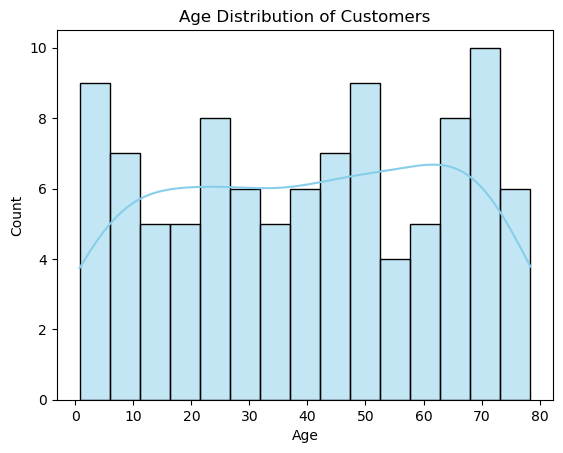

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("Credit Banking_Project - 1.xls")
sns.histplot(data=df, x='Age', bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### 📌 2. City-wise Customer Count – Bar Chart

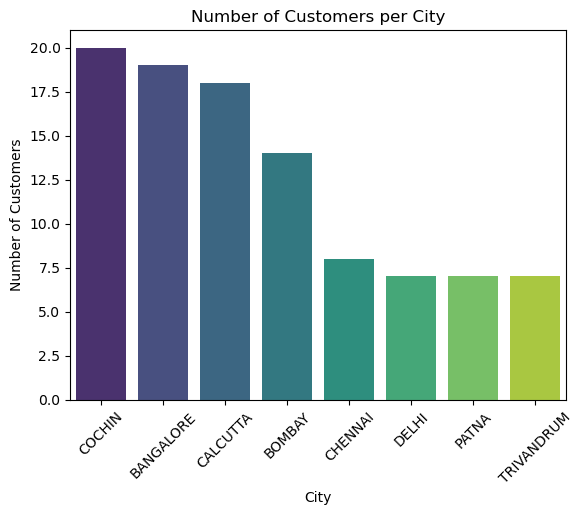

In [10]:
city_counts = df['City'].value_counts()

sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Number of Customers per City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


### 💳 3. Credit Card Product Preference – Count Plot

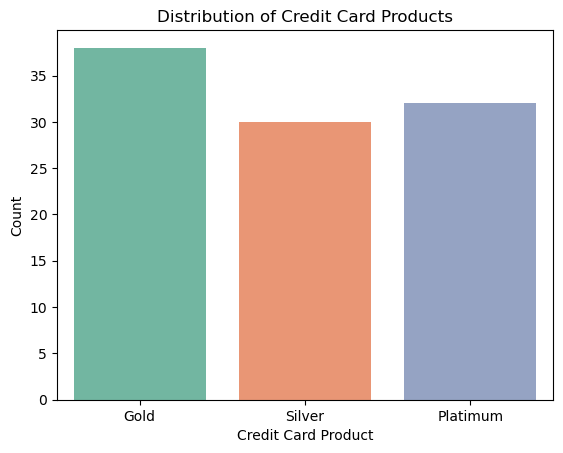

In [11]:
sns.countplot(data=df, x='Credit Card Product', palette='Set2')
plt.title('Distribution of Credit Card Products')
plt.xlabel('Credit Card Product')
plt.ylabel('Count')
plt.show()


### 💼 4. Segment Distribution – Pie Chart

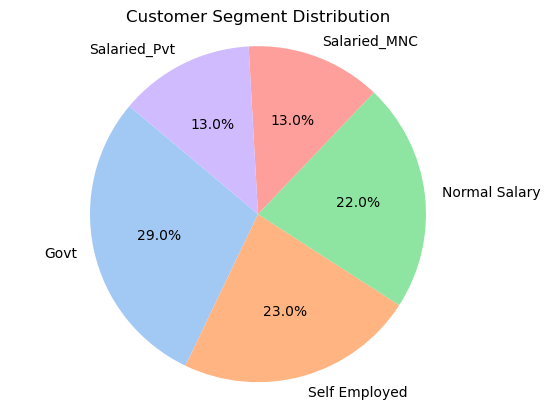

In [12]:
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Segment Distribution')
plt.axis('equal')
plt.show()


### 🏙️ 5. Box Plot of Age by City

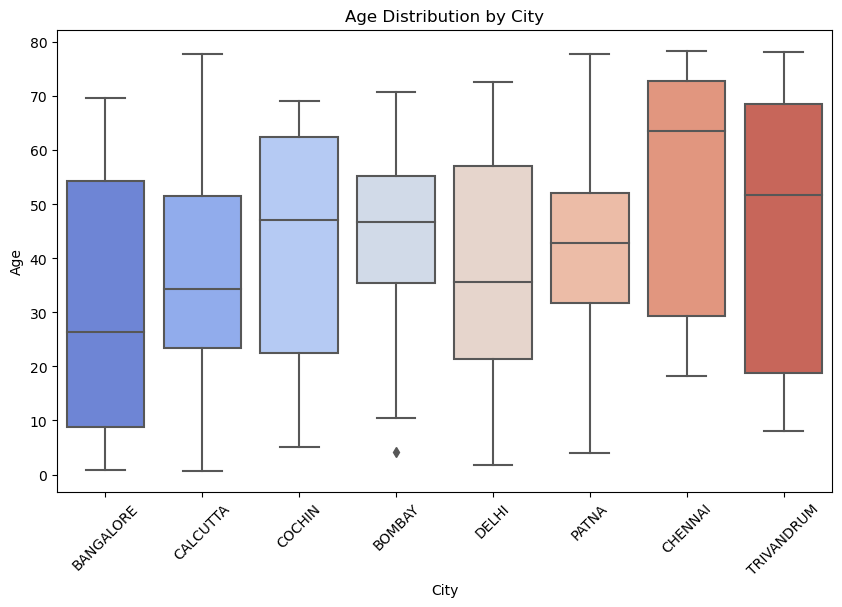

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='City', y='Age', palette='coolwarm')
plt.title('Age Distribution by City')
plt.xticks(rotation=45)
plt.show()


### 🧾 6. Credit Limit vs Age – Scatter Plot

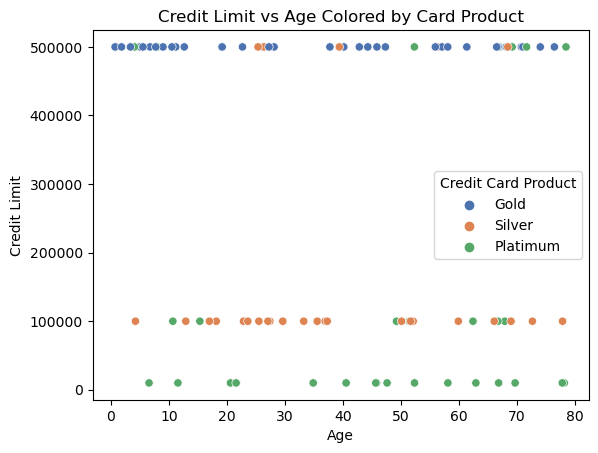

In [19]:
sns.scatterplot(data=df, x='Age', y='Limit', hue='Credit Card Product', palette='deep')
plt.title('Credit Limit vs Age Colored by Card Product')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show()


### 🏢 7. Company-wise Card Distribution – Stacked Bar Chart

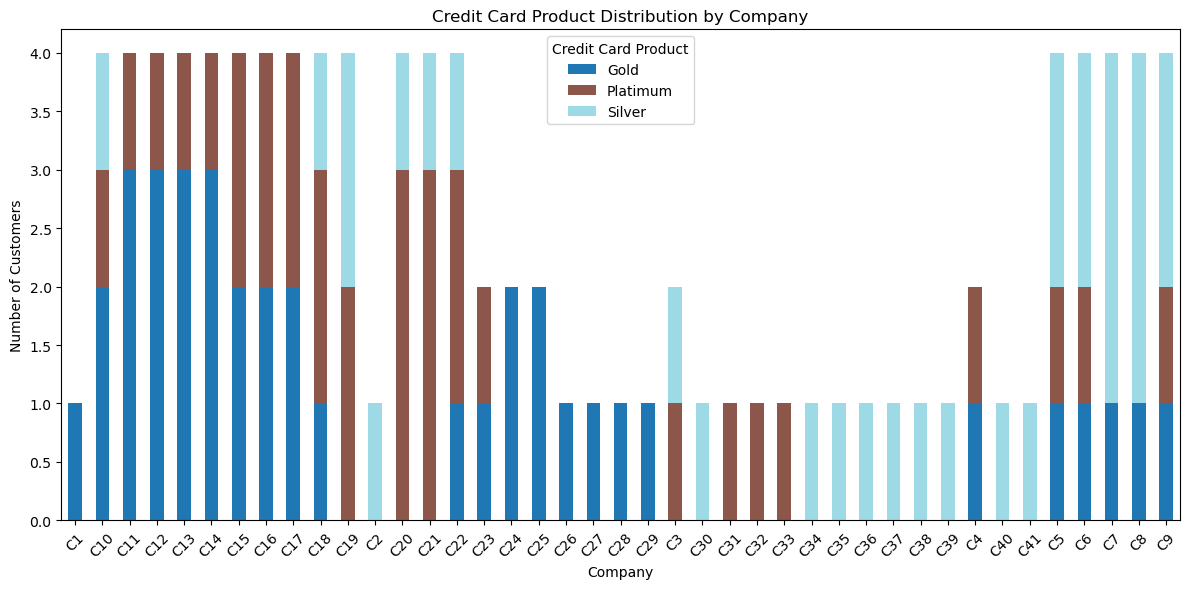

In [17]:
company_card = df.groupby(['Company', 'Credit Card Product']).size().unstack().fillna(0)
company_card.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Credit Card Product Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Credit Card Product')
plt.tight_layout()
plt.show()
